In [3]:
dd = {0: {0: 12, 1: 11, 2: 4},
 1: {0: 0, 1: 1, 2: 1}}

def matrixing(d):
    arr = []
    for key, value in d.items():
        temp = []
        for k, v in value.items():
            temp.append(v)
        arr.append(temp)
    return array(arr)

# x = lambda x : [1] if 1 in x.values() else [0] for i in len(x)
# sum(x(dd[r]) for r in len(dd))
# sum(1 if 1 in dd[i].values() else 0 for i in range(len(dd)))
sum(dd[1].values())
# [[1] if 1 in dd[i] else [0] for i in len(dd)]
# [2 for i in range(len(dd))]

2

In [4]:
from pulp import *
import numpy as np
import time as time

In [5]:
NODE_CPU_INDEX = 0
NODE_MEMORY_INDEX = 1
NODE_POD_SPACE_INDEX = 2

POD_CPU_INDEX = 0
POD_MEMORY_INDEX = 1

In [6]:
podList = list()
podList = [
    [10, 3],
    [10, 1],
    [10, 3]
]
nodeList = [
    [30, 10, 9],
    [40, 20, 7]
]

podNum = 3
nodeNum = 2

# podList = array(podList)
# nodeList = array(nodeList)

# p = [[False for col in range(podNum)] for row in range(nodeNum)]
# E1 = [1 for i in range(podNum)]
# E2 =  [1 for i in range(nodeNum)]
# p = array(p)
p = np.zeros(shape=(podNum,nodeNum))
E1 = np.ones(shape=(1, podNum))
E2 = np.ones(shape=(1, nodeNum))

# a=p*E1.T

p = np.array(
   [ [0, 1,1],
    [0, 0, 0],]
)

# asscalar(matmul(matmul(p, E1.T).T > 0, E2.T))

np.linalg.matrix_rank(p)


1

In [7]:
def nodeCount(d):
    c = 0
    for key, value in d.items():
        f = False
        for k, v in value.items():
            if v == 1:
                f = True
        if f: c = c + 1
    return c
nodeCount(dd)

1

In [8]:
podList = list()
podList = [
    [10, 3],
    [10, 1],
    [5, 3]
]
nodeList = [
    [20, 4, 9],
    [15, 4, 7]
]

podNum = 3
nodeNum = 2

In [9]:
nRow = [i for i in range(nodeNum)]
pCol = [i for i in range(podNum)]

In [10]:
obj_dict = dict()
for i in range(podNum):
    if i == 0:
        obj_dict[i] = 0
    else:
        obj_dict[i] = 1

In [11]:
choices = LpVariable.matrix("choice",  (nRow, pCol),0,1,LpInteger)
# x = np.asscalar(lpDot(np.array(lpDot(choices, E1.T))).T > 0, E2.T)
# x = lpDot(np.array(lpDot(choices, E1.T)).T & E2, E2.T)
# t = np.array(np.matmul(np.array(choices), E1.T)).T

a = np.array(choices).dot(E1.T).T
b = [sum(choices[r]) / len(pCol) for r in range(len(nRow))]
c = lpSum([1 if a[0][r] >= 1 else 0 for r in range(len(nRow))])
# e = sum(round(b[r]) for r in range(len(nRow)))

# np.array(b)
# np.logical_and(np.array(b), E2)
# print(a)
# print(b)
# a =  np.array(choices).dot(E1.T)


# p = LpProblem("text", LpMinimize)
# p +=  [np.sign(sum(choices[r]) / len(pCol)) for r in range(len(nRow))], ""

# for c in pCol:
#     p += lpSum([choices[r][c] for r in nRow]) == 1, ""
# p.solve()
# print(LpStatus[p.status])
# print("objective:",value(p.objective))

In [12]:
import math

choices = LpVariable.matrix("Choice", (nRow, pCol),0,1,LpInteger)
nodeOccupation = LpVariable.matrix("node", nRow,0,1,LpInteger)
# nodeOccupation = [lpSum(choices[n]) for n in range(len(nRow))]
# for n in  range(len(nRow)):
#     nodeOccupation[n].upBound = 1

prob = LpProblem("lp", LpMinimize)

# choices = [LpVariable(f'x{i}{j}', 0, 1, LpInteger) for i in range(nodeNum) for j in range(podNum)]
# matrixing(choices)
# objective
# prob += lpSum([1 if 1 in choices[r].values() else 0 for r in range(len(choices))]), "objective function"
prob += lpSum(nodeOccupation), "objective function"

# one pod can only assign to one node
for c in range(len(pCol)):
    prob += lpSum([choices[r][c] for r in range(len(nRow))]) == 1, ""
    
# print(lpDot(podList, choices))

for r in range(len(nRow)):
    # if there is pod in this node
    for c in range(len(pCol)):
        prob += choices[r][c] <= nodeOccupation[r], ""
    # satisfy node cpu capacity 
    prob += lpSum([podList[c][POD_CPU_INDEX] * choices[r][c]  for c in range(len(pCol))]) <= nodeList[r][NODE_CPU_INDEX], ""
    # satisfy node memory capacity 
    prob += lpSum([podList[c][POD_MEMORY_INDEX] * choices[r][c]  for c in range(len(pCol))]) <= nodeList[r][NODE_MEMORY_INDEX], ""
    # satisfy node pod number capacity 
    prob += lpSum([choices[r][c]  for c in range(len(pCol))]) <= nodeList[r][NODE_POD_SPACE_INDEX]
    
prob.solve()
LpStatus[prob.status]



'Optimal'

In [13]:

print("objective:",value(prob.objective))
print(prob)
for v in prob.variables():
    print(v.name, "=", v.varValue)  
# for r in nRow :
#     for c in pCol:
#         print(value(prob.choices[r][c] ))

objective: 2.0
lp:
MINIMIZE
1*node_0 + 1*node_1 + 0
SUBJECT TO
_C1: Choice_0_0 + Choice_1_0 = 1

_C2: Choice_0_1 + Choice_1_1 = 1

_C3: Choice_0_2 + Choice_1_2 = 1

_C4: Choice_0_0 - node_0 <= 0

_C5: Choice_0_1 - node_0 <= 0

_C6: Choice_0_2 - node_0 <= 0

_C7: 10 Choice_0_0 + 10 Choice_0_1 + 5 Choice_0_2 <= 20

_C8: 3 Choice_0_0 + Choice_0_1 + 3 Choice_0_2 <= 4

_C9: Choice_0_0 + Choice_0_1 + Choice_0_2 <= 9

_C10: Choice_1_0 - node_1 <= 0

_C11: Choice_1_1 - node_1 <= 0

_C12: Choice_1_2 - node_1 <= 0

_C13: 10 Choice_1_0 + 10 Choice_1_1 + 5 Choice_1_2 <= 15

_C14: 3 Choice_1_0 + Choice_1_1 + 3 Choice_1_2 <= 4

_C15: Choice_1_0 + Choice_1_1 + Choice_1_2 <= 7

VARIABLES
0 <= Choice_0_0 <= 1 Integer
0 <= Choice_0_1 <= 1 Integer
0 <= Choice_0_2 <= 1 Integer
0 <= Choice_1_0 <= 1 Integer
0 <= Choice_1_1 <= 1 Integer
0 <= Choice_1_2 <= 1 Integer
0 <= node_0 <= 1 Integer
0 <= node_1 <= 1 Integer

Choice_0_0 = 1.0
Choice_0_1 = 1.0
Choice_0_2 = 0.0
Choice_1_0 = 0.0
Choice_1_1 = 0.0
Choice_1_

# Getting real

In [58]:
def schedule_solve(podList, nodeList, VERBOSE = False):
    podNum = len(podList)
    nodeNum = len(nodeList)

    nRow = [i for i in range(nodeNum)]
    pCol = [i for i in range(podNum)]

    # matrix stands for pod selection
    choices = LpVariable.matrix("Choice", (nRow, pCol),0,1,LpInteger)
    # node usage
    nodeOccupation = LpVariable.matrix("node", nRow,0,1,LpInteger)

    prob = LpProblem("lp", LpMinimize)
    # minimaze the node usage
    prob += lpSum(nodeOccupation), "objective function"

    # one pod can only assign to one node
    for c in range(len(pCol)):
        prob += lpSum([choices[r][c] for r in range(len(nRow))]) == 1, ""


    for r in range(len(nRow)):
        # if there is pod in this node
        for c in range(len(pCol)):
            prob += choices[r][c] <= nodeOccupation[r], ""
        # satisfy node cpu capacity 
        prob += lpSum([podList[c][POD_CPU_INDEX] * choices[r][c]  for c in range(len(pCol))]) <= nodeList[r][NODE_CPU_INDEX], ""
        # satisfy node memory capacity 
        prob += lpSum([podList[c][POD_MEMORY_INDEX] * choices[r][c]  for c in range(len(pCol))]) <= nodeList[r][NODE_MEMORY_INDEX], ""
        # satisfy node pod number capacity 
        prob += lpSum([choices[r][c]  for c in range(len(pCol))]) <= nodeList[r][NODE_POD_SPACE_INDEX]
        
    prob.solve()
    if LpStatus[prob.status] == "Optimal":
        if VERBOSE: 
            print(LpStatus[prob.status])
            print("objective:",value(prob.objective))
            print(prob)
            for v in prob.variables():
                print(v.name, "=", v.varValue)  
    return str(LpStatus[prob.status])

In [23]:
import time as time

start = time.time()
podList = np.random.rand(20, 2)
nodeList = np.random.rand(10, 3)
schedule_solve(podList, nodeList)
print("time:",time.time() - start)

Infeasible
time: 0.04975390434265137


In [16]:
test_case = [
    [20, 5],
    [50, 5],
    [20, 10],
    [50, 10],
    [80, 10],
    [100, 10],
    [150, 10],
    [200, 10],
    [100, 20],
    [200, 20]
]
results = []

In [191]:
for i in test_case:
    d = dict()
    podNum = i[0]
    nodeNum = i[1]
    d['pod_num'] = podNum
    d['node_num'] = nodeNum
    while True:
        podList = np.random.randint(0, 10, (podNum, 2))
        nodeList = np.random.randint(200, 300, (nodeNum, 3))
        start = time.time()
    
        status = schedule_solve(podList, nodeList)
        if status == 'Optimal':
            t = time.time() - start
            d['time'] = t
            d['status'] = status
            results.append(d)
            break

Optimal
objective: 1.0
Optimal
objective: 1.0
Optimal
objective: 1.0
Optimal
objective: 1.0
Optimal
objective: 2.0
Optimal
objective: 2.0
Optimal
objective: 3.0
Optimal
objective: 4.0
Optimal
objective: 2.0
Optimal
objective: 4.0


In [192]:
results

[{'pod_num': 20,
  'node_num': 5,
  'time': 0.030293941497802734,
  'status': 'Optimal'},
 {'pod_num': 50,
  'node_num': 5,
  'time': 0.0713191032409668,
  'status': 'Optimal'},
 {'pod_num': 20,
  'node_num': 10,
  'time': 0.056867122650146484,
  'status': 'Optimal'},
 {'pod_num': 50,
  'node_num': 10,
  'time': 0.13390707969665527,
  'status': 'Optimal'},
 {'pod_num': 80,
  'node_num': 10,
  'time': 0.2531881332397461,
  'status': 'Optimal'},
 {'pod_num': 100,
  'node_num': 10,
  'time': 1.5930910110473633,
  'status': 'Optimal'},
 {'pod_num': 150,
  'node_num': 10,
  'time': 27.096614837646484,
  'status': 'Optimal'},
 {'pod_num': 20,
  'node_num': 5,
  'time': 0.029052019119262695,
  'status': 'Optimal'},
 {'pod_num': 50,
  'node_num': 5,
  'time': 0.07250094413757324,
  'status': 'Optimal'},
 {'pod_num': 20,
  'node_num': 10,
  'time': 0.04073500633239746,
  'status': 'Optimal'},
 {'pod_num': 50,
  'node_num': 10,
  'time': 0.08456897735595703,
  'status': 'Optimal'},
 {'pod_num': 

In [85]:
import json

with open("results.json", 'w') as f:
    json.dump(results, f)

In [86]:
def write_to_file(d):
    with open("results.json", 'a') as f:
        json.dump(results, f)

In [87]:
with open("results.json", 'r') as f:
    load_dict = json.load(f)
    print(load_dict)

[{'pod_num': 0, 'node_num': 5, 'time': 0.012698173522949219, 'status': 'Optimal'}, {'pod_num': 1, 'node_num': 5, 'time': 0.01300811767578125, 'status': 'Optimal'}, {'pod_num': 2, 'node_num': 5, 'time': 0.018734216690063477, 'status': 'Optimal'}, {'pod_num': 3, 'node_num': 5, 'time': 0.015682220458984375, 'status': 'Optimal'}, {'pod_num': 4, 'node_num': 5, 'time': 0.01568913459777832, 'status': 'Optimal'}, {'pod_num': 5, 'node_num': 5, 'time': 0.015537023544311523, 'status': 'Optimal'}, {'pod_num': 6, 'node_num': 5, 'time': 0.015412092208862305, 'status': 'Optimal'}, {'pod_num': 7, 'node_num': 5, 'time': 0.01685810089111328, 'status': 'Optimal'}, {'pod_num': 8, 'node_num': 5, 'time': 0.018400192260742188, 'status': 'Optimal'}, {'pod_num': 9, 'node_num': 5, 'time': 0.019164085388183594, 'status': 'Optimal'}, {'pod_num': 10, 'node_num': 5, 'time': 0.019236087799072266, 'status': 'Optimal'}, {'pod_num': 11, 'node_num': 5, 'time': 0.0195162296295166, 'status': 'Optimal'}, {'pod_num': 12, 'n

In [20]:
start = time.time()
schedule_solve(podList, nodeList)
print("time:", time.time() - start)

Infeasible
time: 0.04793119430541992


In [91]:
import matplotlib.pyplot as plt

def plot(title, x, y):
    figure = plt.figure(figsize = (10,3))
    plt.plot(x, y)
    plt.title(title + ' Time Usage ')
    plt.xlabel('pod number')
    plt.ylabel('time',rotation = 90)
    plt.show()
    
def run_test(podNum, nodeNum):
    d = dict()
    d['pod_num'] = podNum
    d['node_num'] = nodeNum
    while True:
        podList = np.random.randint(0, 10, (podNum, 2))
        nodeList = np.random.randint(200, 300, (nodeNum, 3))
        start = time.time()
    
        status = schedule_solve(podList, nodeList)
        if status == 'Optimal':
            t = time.time() - start
            d['time'] = t
            d['status'] = status
            results.append(d)
            return t

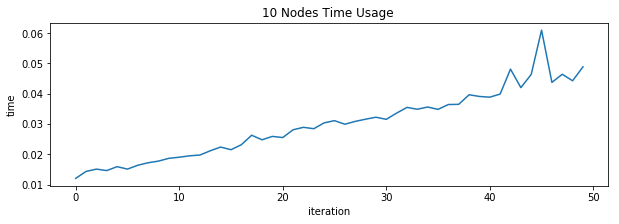

In [71]:
nodeNum = 5
pod_5 = [i for i in range(50)]

t_5 = []
for p in pod_5:
    tt = run_test(p, nodeNum)
    t_5.append(tt)
    
plot("10 Nodes", pod_5, t_5)

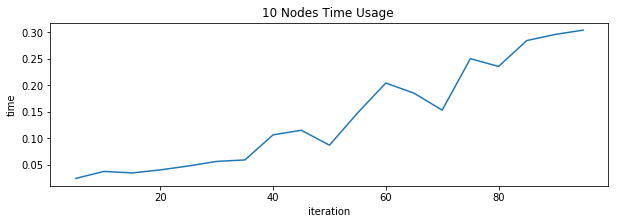

In [81]:
nodeNum = 10
pod_10 = [i*5 for i in range(1, 20)]

t_10 = []
for p in pod_10:
    tt = run_test(p, nodeNum)
    t_10.append(tt)
    
plot("10 Nodes", pod_10, t_10)

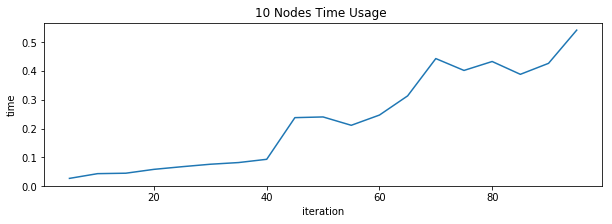

In [78]:
nodeNum = 15
pod_15 = [i*5 for i in range(1, 20)]

t_15 = []
for p in pod_15:
    tt = run_test(p, nodeNum)
    t_15.append(tt)
    
plot("10 Nodes", pod_15, t_15)

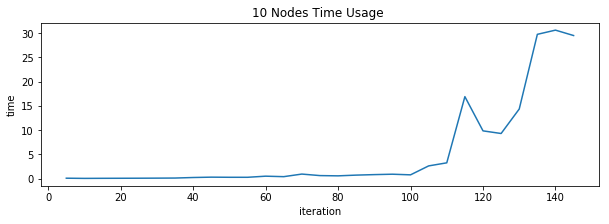

In [83]:
nodeNum = 20
pod_20 = [i*5 for i in range(1, 30)]

t_20 = []
for p in pod_20:
    tt = run_test(p, nodeNum)
    t_20.append(tt)
    
plot("10 Nodes", pod_20, t_20)

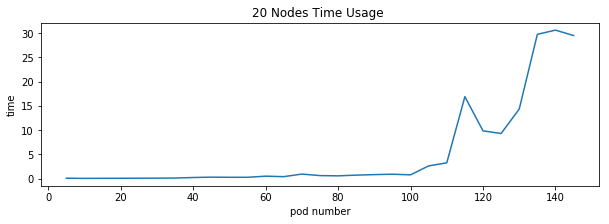

In [92]:
plot("20 Nodes", pod_20, t_20)

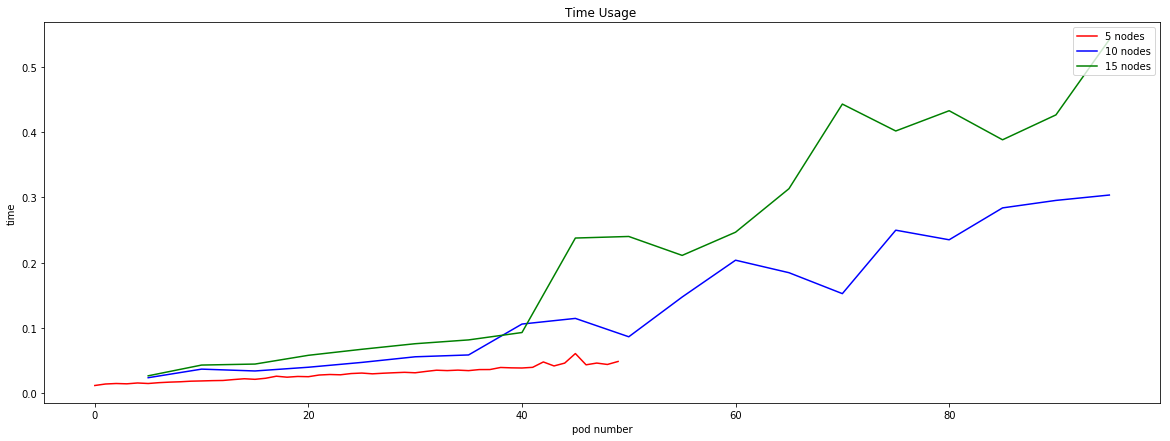

In [88]:
figure = plt.figure(figsize = (20,7))
plt.plot(pod_5, t_5, color = 'red', linewidth = 1.5, label = '5 nodes')
plt.plot(pod_10, t_10, color = 'blue', linewidth = 1.5, label = '10 nodes')
plt.plot(pod_15, t_15, color = 'green', linewidth = 1.5, label = '15 nodes')
# plt.plot(pod_20, t_20, color = 'black', linewidth = 1.5, label = '20 nodes')
plt.title('Time Usage ')
plt.xlabel('pod number')
plt.ylabel('time',rotation = 90)
plt.legend(loc='upper right')
plt.show()

In [89]:
print(sys.path)

['/Users/wangyunwen/Desktop/MicroserviceStudy', '/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/wangyunwen/Library/Python/3.7/lib/python/site-packages', '/usr/local/lib/python3.7/site-packages', '/Users/wangyunwen/Library/Python/3.7/lib/python/site-packages/IPython/extensions', '/Users/wangyunwen/.ipython', '/opt/gurobi201/linux32/lib/python2.5', '/opt/gurobi201/linux32/lib/python2.5']
